# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import string
from keras.optimizers import Adam
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount("drive")


# Selecting the Images and excluding the directories in the folder

### The Text file 'UsedSentences.txt' contains the output of the text in the Image and the name of the Image. The name of the image is used to extract the image from the directory and add it to our dataset.

No of Images : 1774
Characters :  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,*&!@~():`^]¢‘;|-«
No of chars : 82


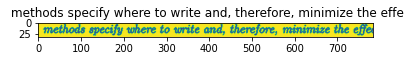

In [2]:
text_file=open(r"UsedSentences.txt","r")

details=[]
outputs=[]
names=[]
for line in text_file:
    a=line.split('#')
    outputs.append(a[1].strip('\n'))
    details.append(a[0])

for detail in details:
    a=detail.split(' ')
    names.append(a[0])
X=[]

for name in names:
    img=Image.open('drive/My Drive/CleanedImages/Encoder_Clean_Renamed/'+name+'.png','r')
    img = img.resize((784,32), Image.ANTIALIAS)
    img=np.asarray(img)
    img=img[:,:,0]
    X.append(img)

X=np.asarray(X)
plt.imshow(X[42])
plt.title(outputs[42])
print("No of Images :",X.shape[0])

symbols = " "+string.ascii_lowercase + string.ascii_uppercase+"0123456789.,*&!@~():`^]¢‘;|-«"
print("Characters :",symbols)
print("No of chars :",len(symbols))

# Creating a One Hot Encoded Array

### 98 is taken as the maximum number of Character in the Sentences. If the letter is present in the output then it is encoded to 1.

In [4]:
Y=np.zeros(shape=(len(outputs),98,len(symbols)))
for example_no,name in enumerate(outputs):
    for letter_no,letter in enumerate(name):
        try:
            Y[example_no][letter_no][symbols.index(letter)]=1
        except:
            print(letter,end=" ")

# Reshaping the array(X) to pass it to the convolution

In [5]:
X=np.reshape(X,(X.shape[0],X.shape[1],X.shape[2],1))
print("Shape of X is :",X.shape)

Shape of X is : (1774, 32, 784, 1)


# Building the Neural Network Model

In [6]:
def OCRModel():
    image=keras.layers.Input((32,784,1))
    conv1=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(image)

    mp1=keras.layers.MaxPooling2D((2,2),padding='same')(conv1)
    conv2=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(mp1)

    mp2=keras.layers.MaxPooling2D((2,2),padding='same')(conv2)
    conv3=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(mp2)

    mp3=keras.layers.MaxPooling2D((2,2),padding='same')(conv3)
    conv4=keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(mp3)

    mp4=keras.layers.MaxPooling2D((2,1),padding='same')(conv4)
    conv5=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp4)

    mp5=keras.layers.MaxPooling2D((2,1),padding='same')(conv5)
    conv6=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp5)


    bn=keras.layers.BatchNormalization()(conv6)
    sq=keras.backend.squeeze(bn,axis=1)

    rn1=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(sq)
    rn2=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(rn1)

    exd=keras.backend.expand_dims(rn2,axis=2)
    maping=keras.layers.Conv2D(len(symbols),(2,2),activation='relu',padding='same')(exd)
    maping=keras.backend.squeeze(maping,axis=2)
    maping = tf.keras.layers.Softmax()(maping)

    model=keras.Model(image,maping)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

In [7]:
from keras.utils.vis_utils import plot_model
OCR=OCRModel()
OCR.fit(X,Y,epochs=50)

Epoch 1/50
56/56 [==============================] - 218s 4s/step - loss: 1.6218
Epoch 2/50
56/56 [==============================] - 208s 4s/step - loss: 1.5169
Epoch 3/50
56/56 [==============================] - 207s 4s/step - loss: 1.4908
Epoch 4/50
56/56 [==============================] - 209s 4s/step - loss: 1.4694
Epoch 5/50
56/56 [==============================] - 208s 4s/step - loss: 1.4412
Epoch 6/50
56/56 [==============================] - 206s 4s/step - loss: 1.3892
Epoch 7/50
56/56 [==============================] - 206s 4s/step - loss: 1.3187
Epoch 8/50
56/56 [==============================] - 211s 4s/step - loss: 1.2096
Epoch 9/50
56/56 [==============================] - 211s 4s/step - loss: 1.0823
Epoch 10/50
56/56 [==============================] - 208s 4s/step - loss: 0.8999
Epoch 11/50
56/56 [==============================] - 208s 4s/step - loss: 0.7549
Epoch 12/50
56/56 [==============================] - 207s 4s/step - loss: 0.5958
Epoch 13/50
56/56 [==================

# Plotting the Model

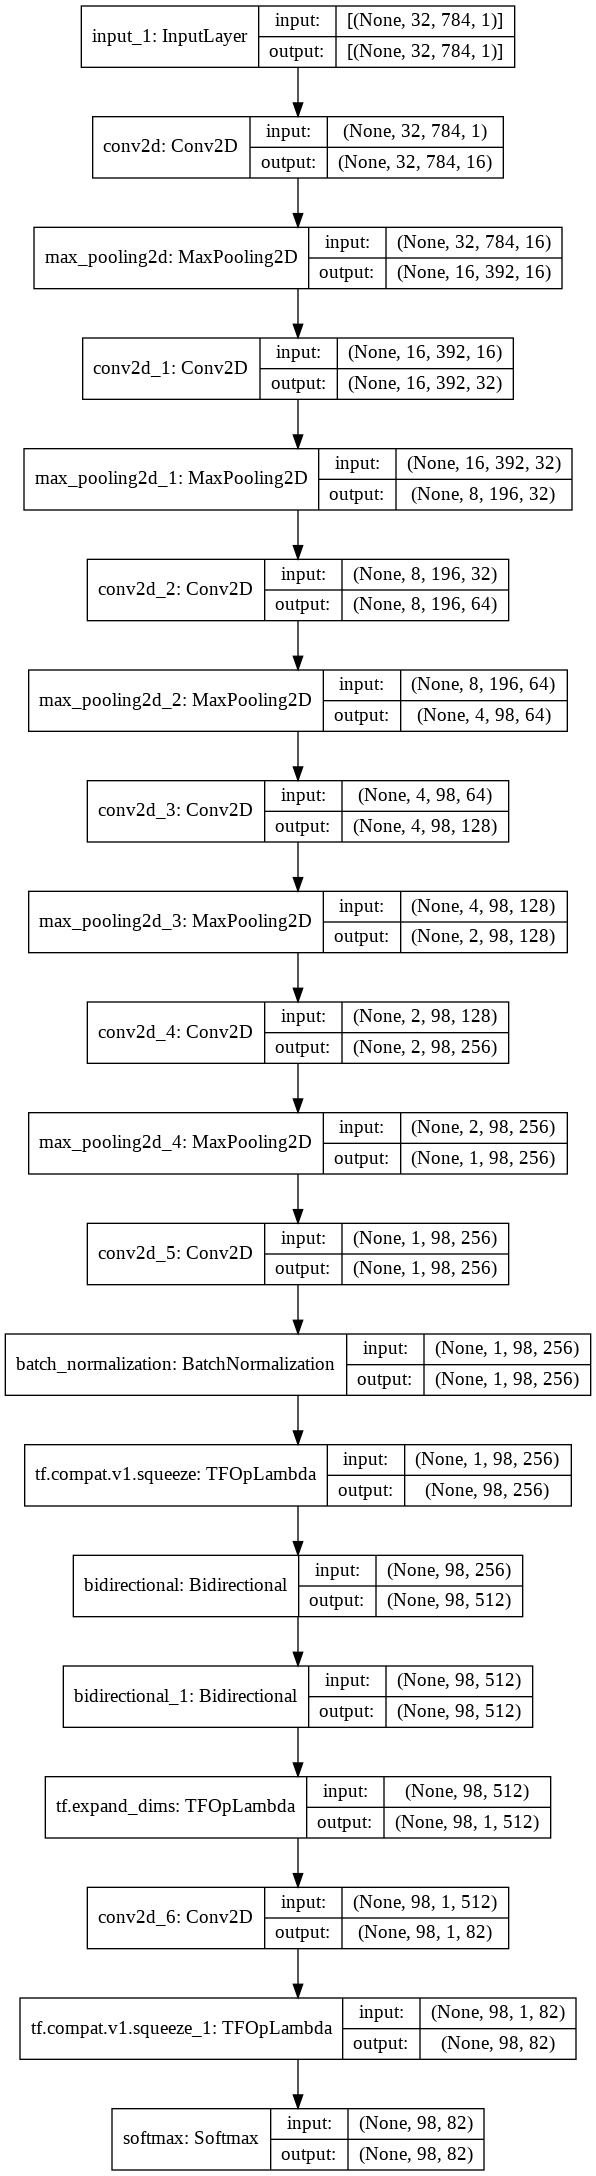

In [8]:
plot_model(OCR, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
arr=OCR.predict(X)
index=466
c=""
print(len(arr[0]))
for i in range(len(arr[0])):
    c=c+(symbols[np.argmax(arr[index][i])])


98


# Seeing the Output of the Model and comparing it with the original output.


predicted: fileer haat repacsss the poxe vvalss  wwihtttenniigh

Orignal:  filter that replaces the pixel values with the neighb


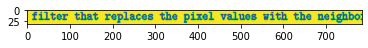

In [15]:
print("predicted:",c.strip())
print("\nOrignal:",outputs[index])
plt.imshow(X[index][:,:,0])